<a href="https://colab.research.google.com/github/cobanov/zemin_istanbul/blob/master/logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                    All rights reserved © Global AI Hub 2020 
![](img/logo.png)


# Logistic Regression 

Logistic regression is a fundamental classification technique. It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression. Logistic regression is fast and relatively uncomplicated, and it’s convenient for you to interpret the results. Although it’s essentially a method for binary classification, it can also be applied to multiclass problems.

You’ll need an understanding of the sigmoid function and the natural logarithm function to understand what logistic regression is and how it works.

This image shows the sigmoid function (or S-shaped curve) of some variable 𝑥:

<img src="img/s.jpeg" />

The sigmoid function has values very close to either 0 or 1 across most of its domain. This fact makes it suitable for application in classification methods.

## Single-Variate Logistic Regression

Single-variate logistic regression is the most straightforward case of logistic regression. There is only one independent variable (or feature), which is 𝐱 = 𝑥. This figure illustrates single-variate logistic regression:

<img src="img/logis.jpg" />

Here, you have a given set of input-output (or 𝑥-𝑦) pairs, represented by green circles. These are your observations. Remember that 𝑦 can only be 0 or 1. For example, the leftmost green circle has the input 𝑥 = 0 and the actual output 𝑦 = 0. The rightmost observation has 𝑥 = 9 and 𝑦 = 1.

Logistic regression finds the weights 𝑏₀ and 𝑏₁ that correspond to the maximum log-likelihood function (LLF). These weights define the logit 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥, which is the dashed black line. They also define the predicted probability $p(x) = 1 / (1 + exp(−𝑓(𝑥)))$, shown here as the full black line. In this case, the threshold 𝑝(𝑥) = 0.5 and 𝑓(𝑥) = 0 corresponds to the value of 𝑥 slightly higher than 3. This value is the limit between the inputs with the predicted outputs of 0 and 1.

## Logistic Regression in Python

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [19]:
model = LogisticRegression(random_state = 42)

In [20]:
model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
print("Classes: ", model.classes_)
print("Intercept: ",model.intercept_)
print("Coef: ",model.coef_)

Classes:  [0 1]
Intercept:  [-4.12617727]
Coef:  [[1.18109091]]


In [22]:
print("Probability: ",model.predict_proba(x))

Probability:  [[0.98411203 0.01588797]
 [0.95003074 0.04996926]
 [0.85370936 0.14629064]
 [0.64173546 0.35826454]
 [0.35475873 0.64524127]
 [0.1443924  0.8556076 ]
 [0.04924876 0.95075124]
 [0.01565079 0.98434921]
 [0.00485659 0.99514341]
 [0.00149573 0.99850427]]


In [23]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [24]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

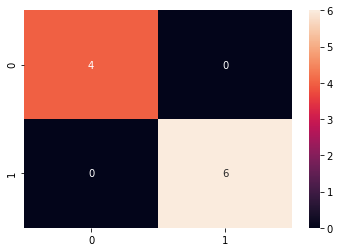

In [25]:
import seaborn as sns

cm = confusion_matrix(y, model.predict(x))
sns.heatmap(cm, annot=True)

In [12]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [47]:
model = LogisticRegression(solver='liblinear', C=0.5, random_state=0)
model.fit(x, y)

LogisticRegression(C=0.5, random_state=0, solver='liblinear')

In [48]:
model.intercept_

array([-0.61167085])

In [49]:
model.coef_

array([[0.41299976]])

In [50]:
model.predict_proba(x)

array([[0.64832185, 0.35167815],
       [0.54950505, 0.45049495],
       [0.44662201, 0.55337799],
       [0.34811656, 0.65188344],
       [0.26108668, 0.73891332],
       [0.18948992, 0.81051008],
       [0.13396721, 0.86603279],
       [0.09284959, 0.90715041],
       [0.06342763, 0.93657237],
       [0.04288806, 0.95711194]])

In [51]:
model.predict(x)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [52]:
model.score(x, y)

0.8

In [53]:
confusion_matrix(y, model.predict(x))

array([[2, 2],
       [0, 6]], dtype=int64)

<AxesSubplot:>

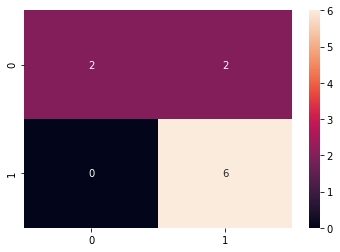

In [56]:
sns.heatmap(confusion_matrix(y, model.predict(x)), annot=True)



In [54]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.75      1.00      0.86         6

    accuracy                           0.80        10
   macro avg       0.88      0.75      0.76        10
weighted avg       0.85      0.80      0.78        10



## Evaluation Metrics

![](img/acc.png)

F-score = $F_1 = 2 * \frac{precision\,*\,recall}{precision\, +\, recall}$

Find all evaluation metrics in sklearn library by clicking [here.](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, cv["estimator"][0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.99      0.99      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

